# Exploración y visualización de datos

Cargamos las librerías que utilizaremos para la manipulación y visualización de los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos el dataset limpio
data_cleaned = pd.read_csv("../data/interim/data_cleaned.csv", index_col=0)

In [3]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9718 entries, 0 to 9717
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Concepto turístico                9718 non-null   object 
 1   Comunidades y Ciudades Autónomas  9718 non-null   object 
 2   Residencia del viajero            9718 non-null   object 
 3   Total                             9718 non-null   float64
 4   Año                               9718 non-null   int64  
 5   Mes                               9718 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 531.5+ KB


Reordenamos la tabla de datos para mayor legibilidad y manejo de la misma.

In [4]:
data_pivot = data_cleaned.pivot_table(index=['Comunidades y Ciudades Autónomas', 'Residencia del viajero', 'Mes','Año'],
                                columns='Concepto turístico',
                                values='Total').reset_index()

# Renombramos las columnas para mayor claridad
data_pivot.columns.name = None  # Eliminar el nombre de la columna índice
data_pivot = data_pivot.rename(columns={
    'Número de alojamientos turísticos ocupados': 'Alojamientos Ocupados',
    'Número de noches ocupadas': 'Noches Ocupadas',
    'Estancia media': 'Estancia Media'
})

Consultamos los valores nulos

In [5]:
data_pivot.isnull().sum()

Comunidades y Ciudades Autónomas      0
Residencia del viajero                0
Mes                                   0
Año                                   0
Estancia Media                      301
Alojamientos Ocupados               301
Noches Ocupadas                       0
dtype: int64

Eliminamos los valores nulos

In [6]:
data_pivot = data_pivot.dropna().reset_index(drop=True)

In [7]:
data_pivot.describe()

,Mes,Año,Estancia Media,Alojamientos Ocupados,Noches Ocupadas
count,3139.000000,3139.000000,3139.000000,3.139000e+03,3.139000e+03
mean,6.341510,2020.291813,3.979356,4.645014e+04,2.105814e+05
std,3.387917,1.651303,1.658770,1.111718e+05,5.243361e+05
min,1.000000,2018.000000,1.500000,1.000000e+03,2.000000e+03
25%,3.000000,2019.000000,2.800000,4.000000e+03,1.100000e+04
50%,6.000000,2020.000000,3.500000,1.000000e+04,3.300000e+04
75%,9.000000,2022.000000,4.700000,3.900000e+04,1.830000e+05
max,12.000000,2023.000000,22.000000,1.287000e+06,6.558000e+06


In [8]:
data_pivot.to_csv('../data/interim/data_eda.csv')

## Gráficos de datos

In [9]:
sns.set_theme(style='darkgrid')

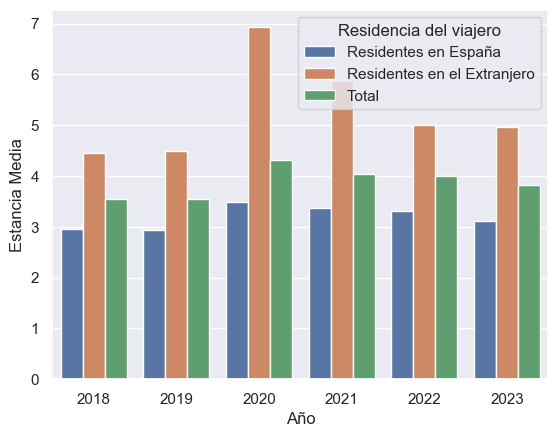

In [10]:
sns.barplot(data=data_pivot, x='Año', y='Estancia Media', hue='Residencia del viajero', errorbar=None)
plt.show()

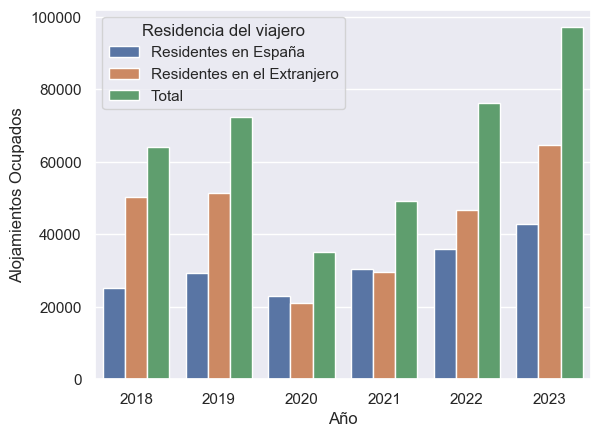

In [11]:
sns.barplot(data=data_pivot, x='Año', y='Alojamientos Ocupados', hue='Residencia del viajero', errorbar=None)
plt.show()

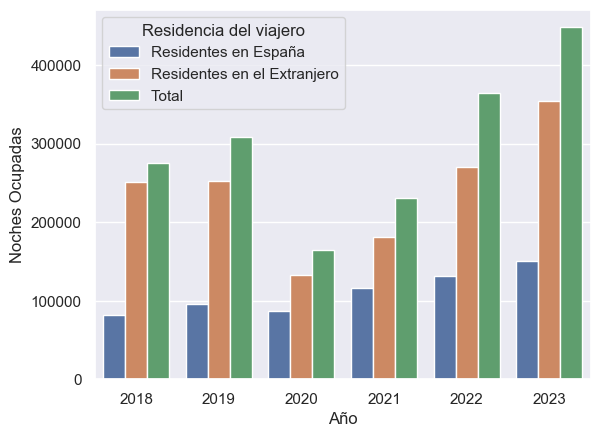

In [12]:
sns.barplot(data=data_pivot, x='Año', y='Noches Ocupadas', hue='Residencia del viajero', errorbar=None)
plt.show()

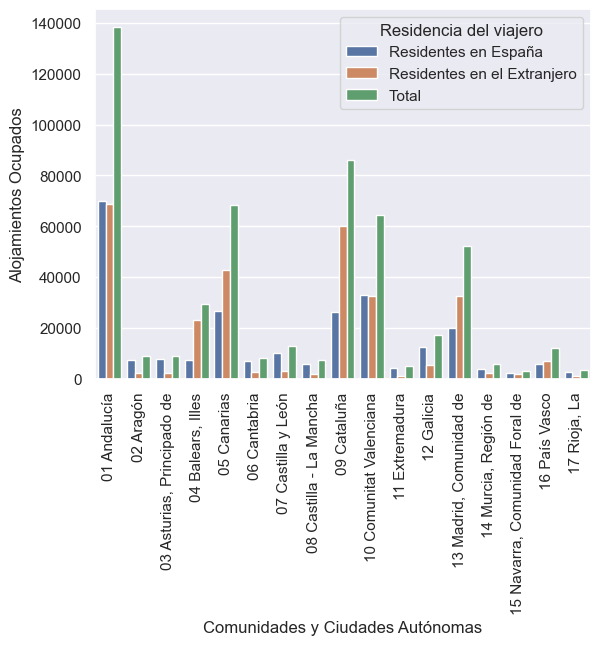

In [13]:
sns.barplot(data=data_pivot.query("`Comunidades y Ciudades Autónomas`!='Total Nacional'"), x='Comunidades y Ciudades Autónomas', y='Alojamientos Ocupados', hue='Residencia del viajero', errorbar=None)
plt.xticks(rotation=90)
plt.show()

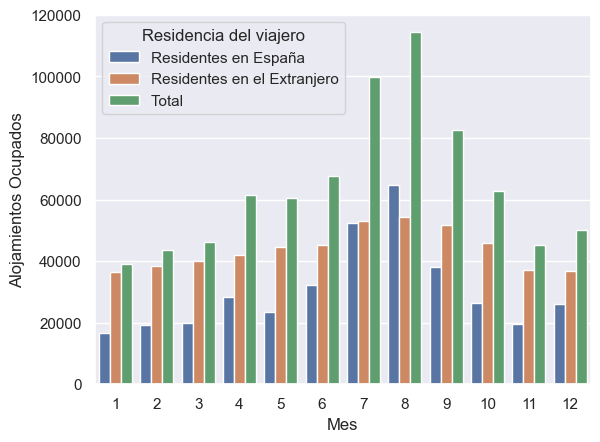

In [14]:
sns.barplot(data_pivot, x='Mes', y='Alojamientos Ocupados', hue='Residencia del viajero', errorbar=None)
plt.show()

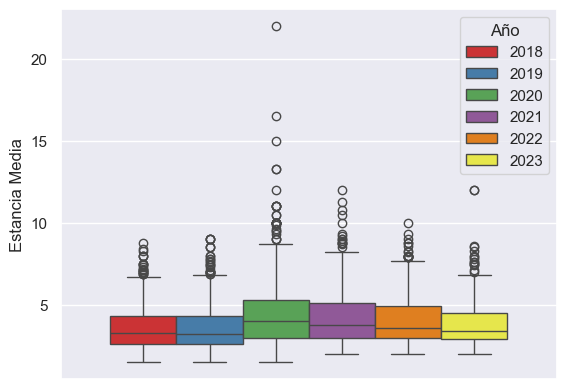

In [15]:
sns.boxplot(hue='Año', y='Estancia Media', data=data_pivot, palette='Set1')
plt.show()

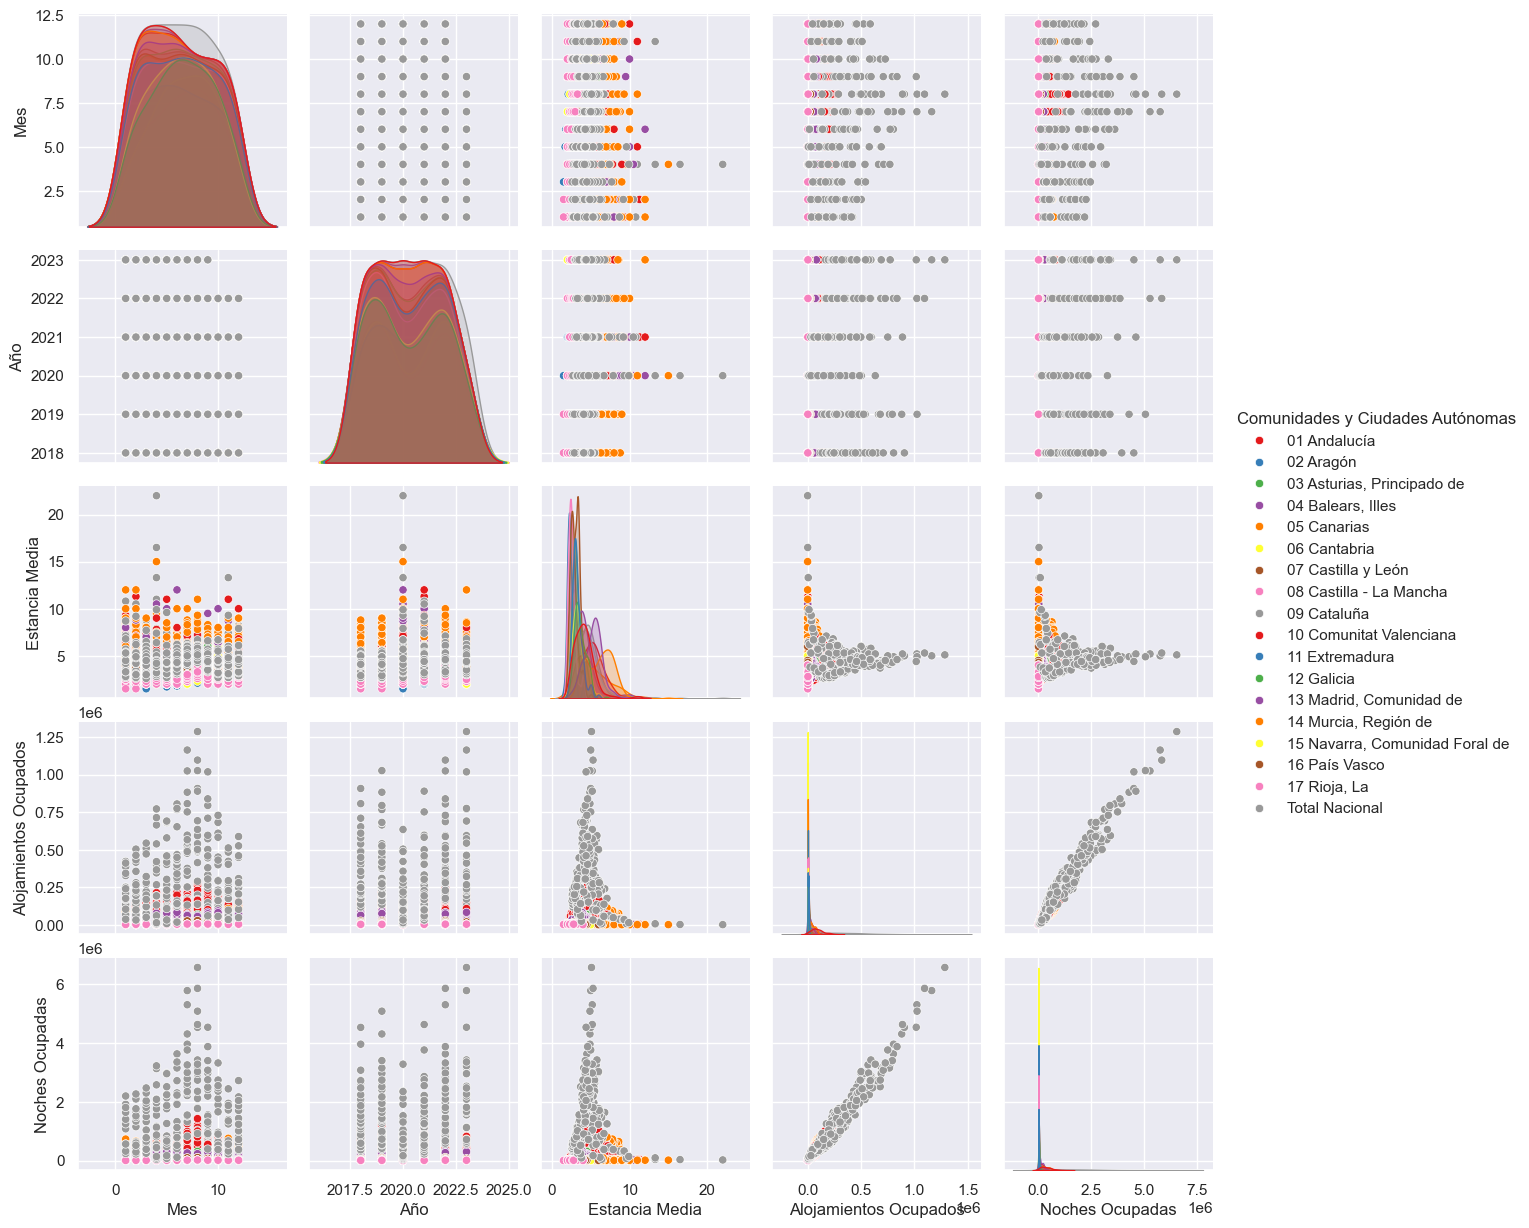

In [16]:
sns.pairplot(data_pivot, hue='Comunidades y Ciudades Autónomas', palette='Set1')
plt.show()

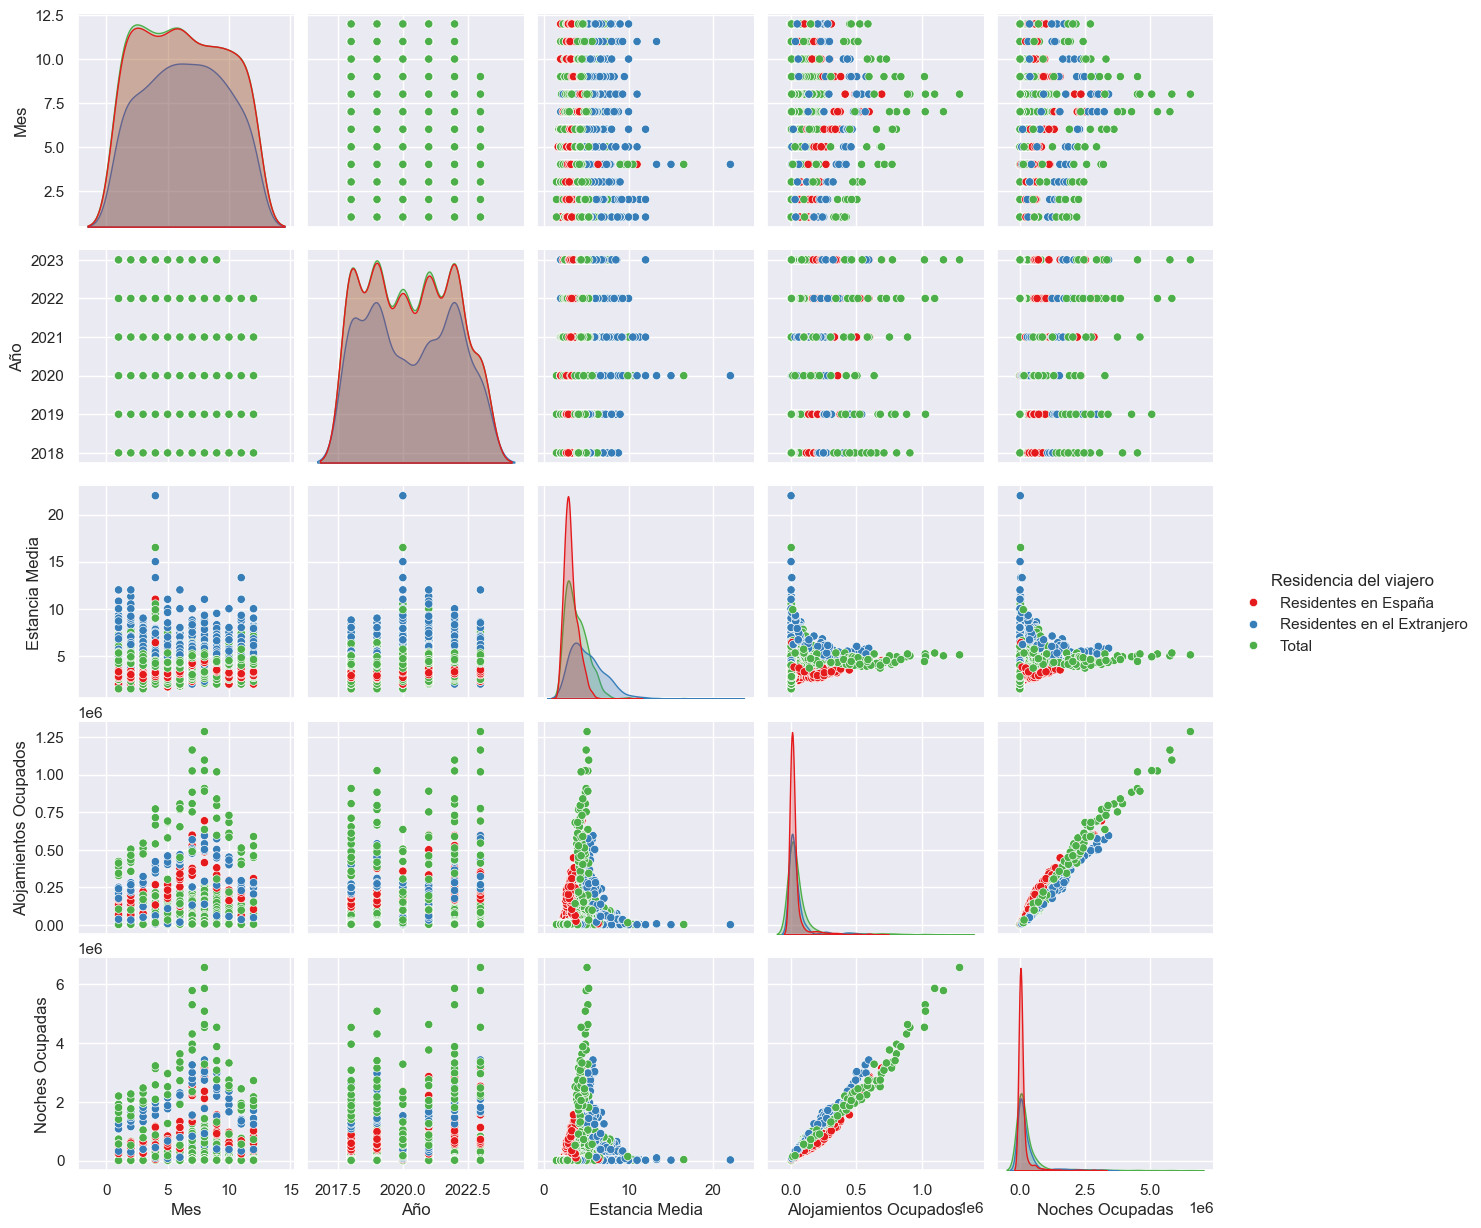

In [17]:
sns.pairplot(data_pivot, hue='Residencia del viajero', palette='Set1')
plt.show()